In [35]:
import pandas as pd


In [37]:
data=pd.read_csv("train.csv")#Making it Relative Path -Mayank

In [38]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [40]:
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline

In [41]:
data.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

In [42]:
data.shape

(10886, 12)

In [43]:
data['datetime'] = pd.to_datetime(data['datetime'], errors='coerce')

In [44]:
data['year'] = data['datetime'].dt.year 
data['month'] = data['datetime'].dt.month 
data['day'] = data['datetime'].dt.day 
data['hour'] = data['datetime'].dt.hour 


In [45]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4


In [46]:
data=data.drop('datetime',axis=1)

In [47]:
def normalize(df,columns):
    result=df.copy()
    for feature_name in columns :
        mean_value = df[feature_name].mean()
        std_value = df[feature_name].std()
        result[feature_name] = (df[feature_name] - mean_value) / std_value
        
    return result

In [48]:
data_normalize=normalize(data,["temp","atemp","humidity","windspeed"])


In [49]:



def dummy_data(data, columns):
    for column in columns:
        data = pd.concat([data, pd.get_dummies(data[column], prefix=column)], axis=1)
        data = data.drop(column, axis=1)
    return data



In [50]:


data = dummy_data(data_normalize, ["season","weather","hour"])


In [51]:
data.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,-1.333599,-1.092687,0.993167,-1.567682,3,13,16,2011,...,0,0,0,0,0,0,0,0,0,0
1,0,0,-1.438841,-1.182367,0.941206,-1.567682,8,32,40,2011,...,0,0,0,0,0,0,0,0,0,0
2,0,0,-1.438841,-1.182367,0.941206,-1.567682,5,27,32,2011,...,0,0,0,0,0,0,0,0,0,0
3,0,0,-1.333599,-1.092687,0.681399,-1.567682,3,10,13,2011,...,0,0,0,0,0,0,0,0,0,0
4,0,0,-1.333599,-1.092687,0.681399,-1.567682,0,1,1,2011,...,0,0,0,0,0,0,0,0,0,0


In [52]:
import seaborn as sns

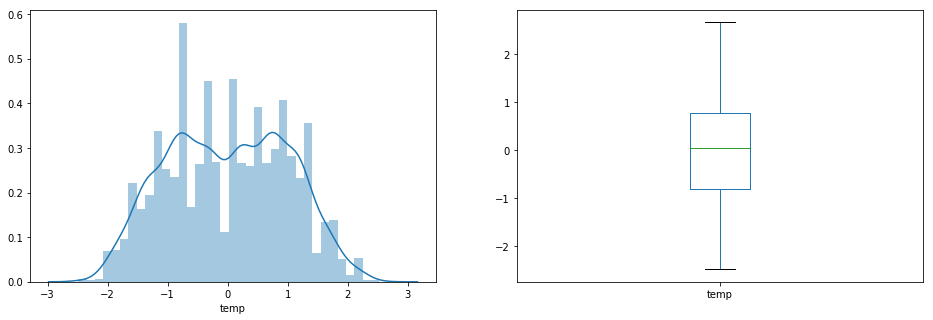

In [53]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['temp']); 
plt.subplot(122)
data_normalize['temp'].plot.box(figsize=(16,5)) 
plt.show()

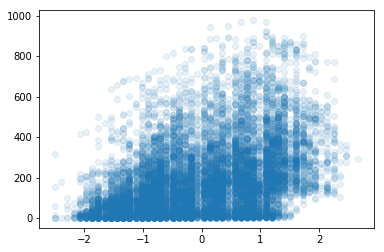

In [54]:
plt.scatter(data['temp'],data['count'],alpha=0.1,
            cmap='viridis')

In [55]:
data['temp'].describe()

count    1.088600e+04
mean     2.401982e-16
std      1.000000e+00
min     -2.491258e+00
25%     -8.073910e-01
50%      3.454240e-02
75%      7.712342e-01
max      2.665584e+00
Name: temp, dtype: float64

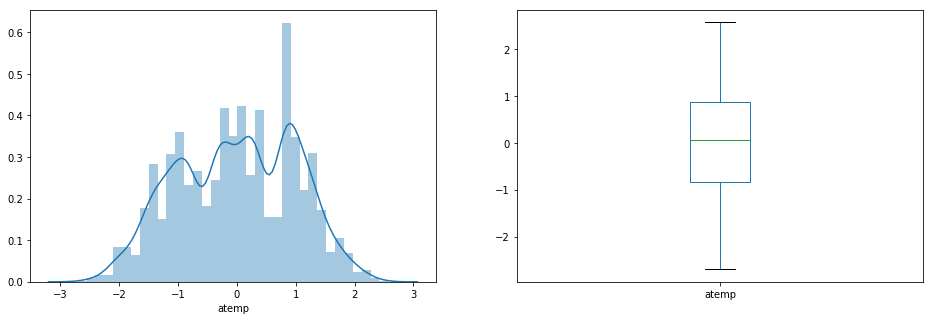

In [56]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['atemp']); 
plt.subplot(122)
data_normalize['atemp'].plot.box(figsize=(16,5)) 
plt.show()

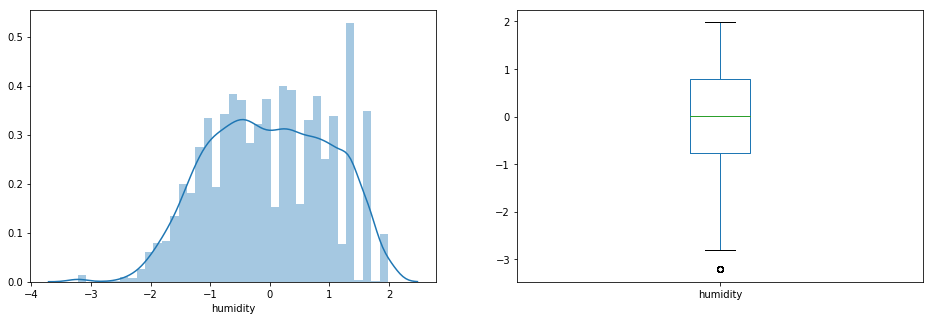

In [57]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['humidity']); 
plt.subplot(122)
data_normalize['humidity'].plot.box(figsize=(16,5)) 
plt.show()

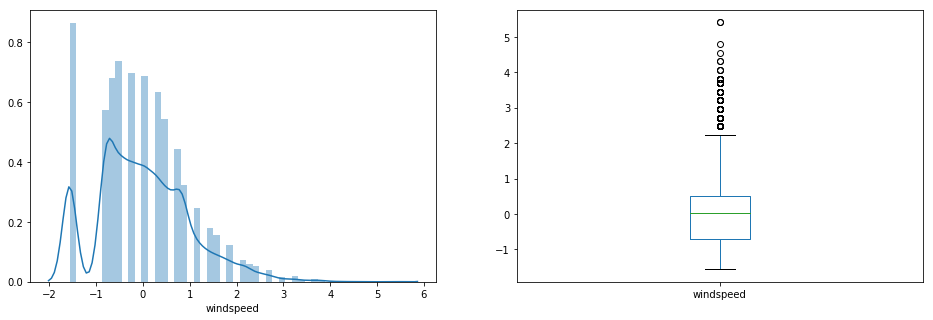

In [58]:
plt.figure(1)
plt.subplot(121)
sns.distplot(data['windspeed']); 
plt.subplot(122)
data_normalize['windspeed'].plot.box(figsize=(16,5)) 
plt.show()

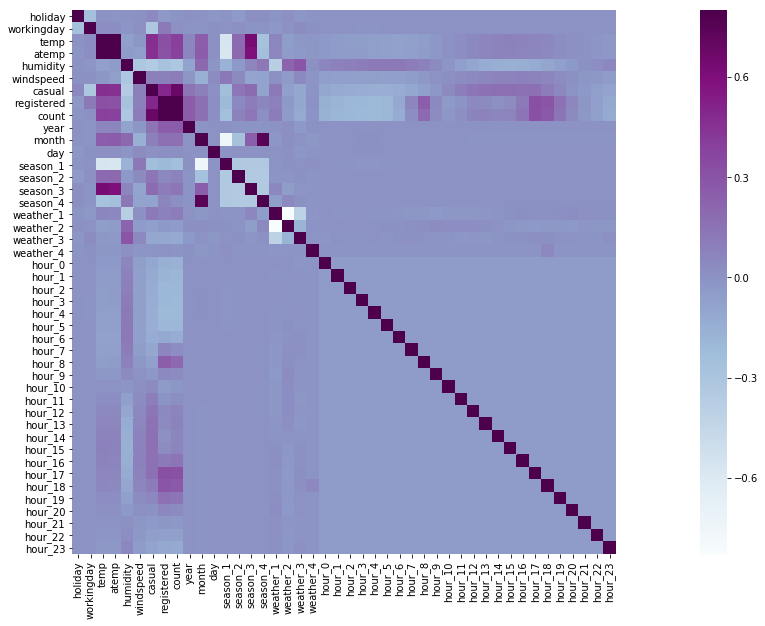

In [59]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(30, 10))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [60]:
import numpy as np

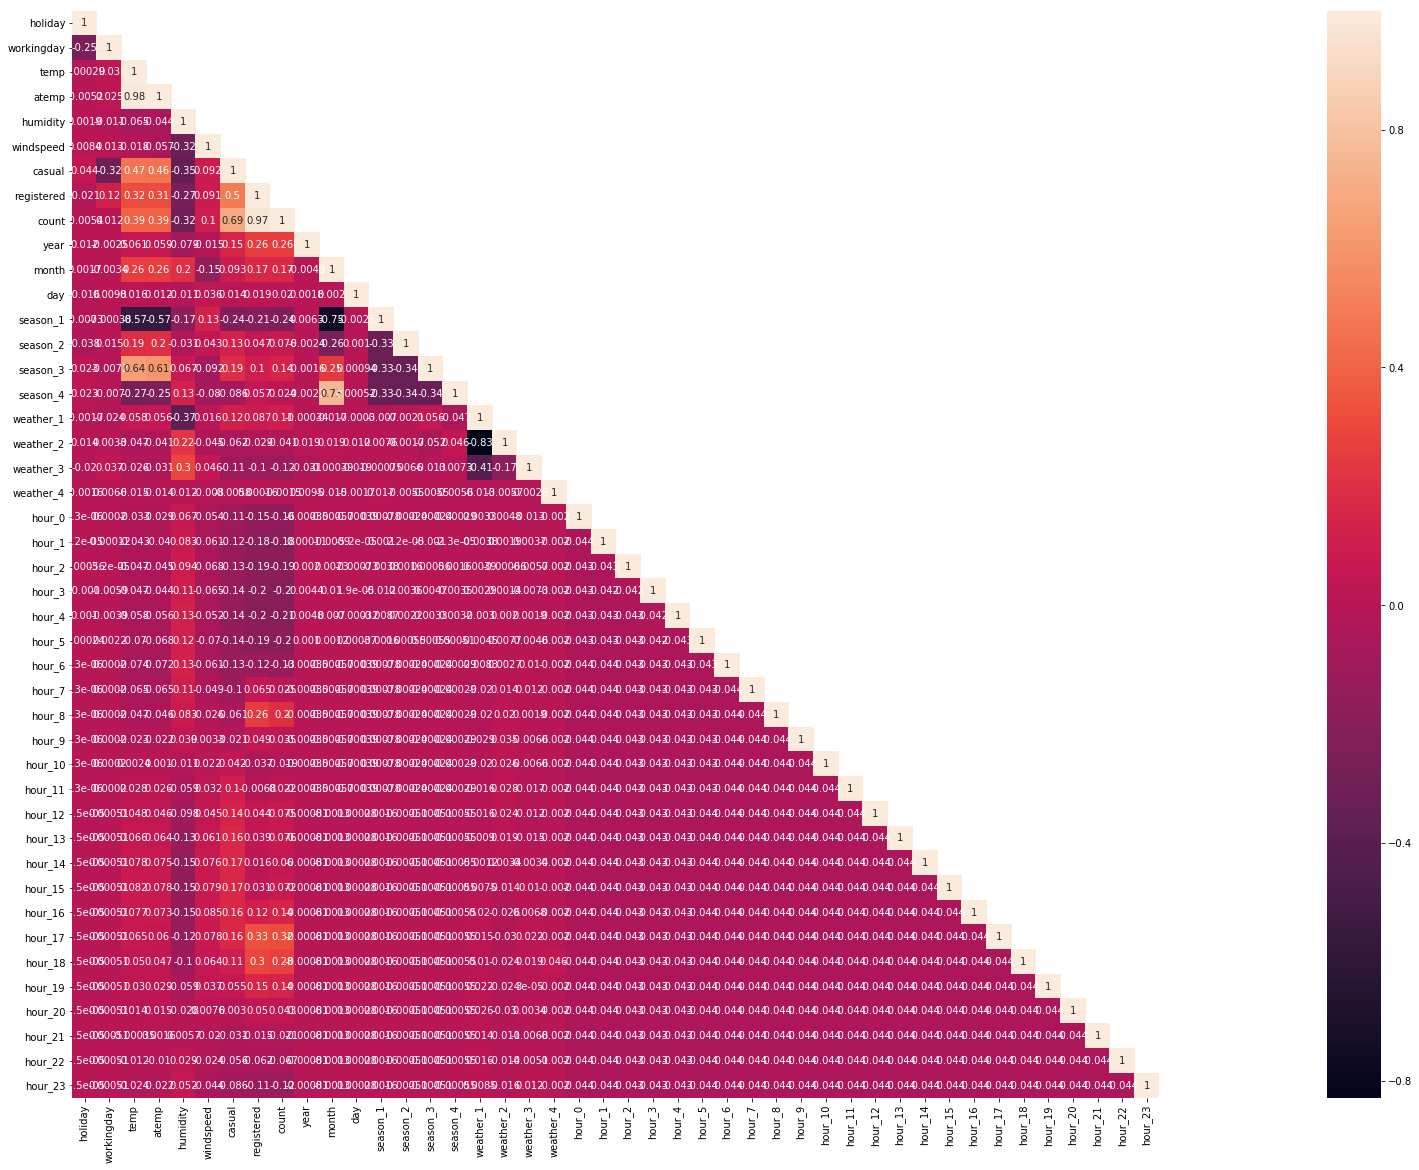

In [61]:
corrMat = data.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
fig, ax= plt.subplots(figsize=(60, 20))
sns.heatmap(corrMat, mask=mask,vmax=1., square=True,annot=True)

In [62]:
data.corr()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
holiday,1.000000,-0.250491,0.000295,-0.005215,0.001929,0.008409,0.043799,-0.020956,-0.005393,0.012021,...,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075,-0.000075
workingday,-0.250491,1.000000,0.029966,0.024660,-0.010880,0.013373,-0.319111,0.119460,0.011594,-0.002482,...,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513,0.000513
temp,0.000295,0.029966,1.000000,0.984948,-0.064949,-0.017852,0.467097,0.318571,0.394454,0.061226,...,0.078261,0.081880,0.077489,0.065038,0.050367,0.030436,0.013931,-0.000354,-0.012467,-0.023808
atemp,-0.005215,0.024660,0.984948,1.000000,-0.043536,-0.057473,0.462067,0.314635,0.389784,0.058540,...,0.075487,0.078396,0.073191,0.060075,0.047119,0.029169,0.015231,0.001621,-0.010430,-0.021702
humidity,0.001929,-0.010880,-0.064949,-0.043536,1.000000,-0.318607,-0.348187,-0.265458,-0.317371,-0.078606,...,-0.146758,-0.150047,-0.145353,-0.124575,-0.100366,-0.059264,-0.027645,0.005666,0.029136,0.051748
windspeed,0.008409,0.013373,-0.017852,-0.057473,-0.318607,1.000000,0.092276,0.091052,0.101369,-0.015221,...,0.076080,0.079278,0.085403,0.077874,0.063611,0.036765,0.007613,-0.019514,-0.024450,-0.044105
casual,0.043799,-0.319111,0.467097,0.462067,-0.348187,0.092276,1.000000,0.497250,0.690414,0.145241,...,0.169792,0.167442,0.163486,0.164982,0.106204,0.054630,0.002974,-0.031198,-0.056163,-0.086048
registered,-0.020956,0.119460,0.318571,0.314635,-0.265458,0.091052,0.497250,1.000000,0.970948,0.264265,...,0.015645,0.031451,0.118697,0.329179,0.296144,0.153190,0.050162,-0.014882,-0.061716,-0.112840
count,-0.005393,0.011594,0.394454,0.389784,-0.317371,0.101369,0.690414,0.970948,1.000000,0.260403,...,0.059874,0.072405,0.144061,0.319974,0.276218,0.142797,0.042645,-0.021013,-0.066949,-0.117819
year,0.012021,-0.002482,0.061226,0.058540,-0.078606,-0.015221,0.145241,0.264265,0.260403,1.000000,...,-0.000807,-0.000807,-0.000807,-0.000807,-0.000807,-0.000807,-0.000807,-0.000807,-0.000807,-0.000807


In [63]:
data.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,year,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0,0,-1.333599,-1.092687,0.993167,-1.567682,3,13,16,2011,...,0,0,0,0,0,0,0,0,0,0
1,0,0,-1.438841,-1.182367,0.941206,-1.567682,8,32,40,2011,...,0,0,0,0,0,0,0,0,0,0
2,0,0,-1.438841,-1.182367,0.941206,-1.567682,5,27,32,2011,...,0,0,0,0,0,0,0,0,0,0
3,0,0,-1.333599,-1.092687,0.681399,-1.567682,3,10,13,2011,...,0,0,0,0,0,0,0,0,0,0
4,0,0,-1.333599,-1.092687,0.681399,-1.567682,0,1,1,2011,...,0,0,0,0,0,0,0,0,0,0


In [64]:

def split_valid_test_data(data, fraction=(1 - 0.8)):
    data_y = data["count"]
    
    

    data_x = data.drop(["count","casual","registered"], axis=1)

    

    return data_x.values, data_y

data_x, data_y = split_valid_test_data(data)

In [65]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.callbacks import ModelCheckpoint

In [66]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = data_x.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               5376      
_________________________________________________________________
dense_7 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 257       
Total params: 170,241
Trainable params: 170,241
Non-trainable params: 0
_________________________________________________________________


In [67]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose =1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [72]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch
  
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error')
  plt.plot(hist['epoch'], hist['mean_absolute_error'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mean_absolute_error'],
           label = 'Val Error')
  plt.ylim([0,5])
  plt.legend()
  
 
 
  plt.legend()
  plt.show()

In [70]:
history=NN_model.fit(data_x, data_y, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)


Train on 8708 samples, validate on 2178 samples
Epoch 1/500
8708/8708 [==============================] - 1s 152us/step - loss: 42.6937 - mean_absolute_error: 42.6937 - val_loss: 99.6374 - val_mean_absolute_error: 99.6374

Epoch 00001: val_loss did not improve from 54.22862
Epoch 2/500
8708/8708 [==============================] - 1s 150us/step - loss: 43.8229 - mean_absolute_error: 43.8229 - val_loss: 87.3133 - val_mean_absolute_error: 87.3133

Epoch 00002: val_loss did not improve from 54.22862
Epoch 3/500
8708/8708 [==============================] - 1s 153us/step - loss: 42.4069 - mean_absolute_error: 42.4069 - val_loss: 111.7977 - val_mean_absolute_error: 111.7977

Epoch 00003: val_loss did not improve from 54.22862
Epoch 4/500
8708/8708 [==============================] - 1s 158us/step - loss: 44.1342 - mean_absolute_error: 44.1342 - val_loss: 101.6503 - val_mean_absolute_error: 101.6503

Epoch 00004: val_loss did not improve from 54.22862
Epoch 5/500
8708/8708 [=====================

8708/8708 [==============================] - 1s 144us/step - loss: 42.9569 - mean_absolute_error: 42.9569 - val_loss: 95.9565 - val_mean_absolute_error: 95.9565

Epoch 00037: val_loss did not improve from 54.22862
Epoch 38/500
8708/8708 [==============================] - 1s 147us/step - loss: 41.9824 - mean_absolute_error: 41.9824 - val_loss: 73.9165 - val_mean_absolute_error: 73.9165

Epoch 00038: val_loss did not improve from 54.22862
Epoch 39/500
8708/8708 [==============================] - 1s 146us/step - loss: 42.2076 - mean_absolute_error: 42.2076 - val_loss: 91.9736 - val_mean_absolute_error: 91.9736

Epoch 00039: val_loss did not improve from 54.22862
Epoch 40/500
8708/8708 [==============================] - 1s 145us/step - loss: 41.6335 - mean_absolute_error: 41.6335 - val_loss: 89.7186 - val_mean_absolute_error: 89.7186

Epoch 00040: val_loss did not improve from 54.22862
Epoch 41/500
8708/8708 [==============================] - 1s 144us/step - loss: 43.1589 - mean_absolute_e

8708/8708 [==============================] - 1s 148us/step - loss: 42.3645 - mean_absolute_error: 42.3645 - val_loss: 86.0154 - val_mean_absolute_error: 86.0154

Epoch 00073: val_loss did not improve from 54.22862
Epoch 74/500
8708/8708 [==============================] - 1s 145us/step - loss: 42.6428 - mean_absolute_error: 42.6428 - val_loss: 77.5178 - val_mean_absolute_error: 77.5178

Epoch 00074: val_loss did not improve from 54.22862
Epoch 75/500
8708/8708 [==============================] - 1s 144us/step - loss: 41.1532 - mean_absolute_error: 41.1532 - val_loss: 72.5895 - val_mean_absolute_error: 72.5895

Epoch 00075: val_loss did not improve from 54.22862
Epoch 76/500
8708/8708 [==============================] - 1s 145us/step - loss: 42.2263 - mean_absolute_error: 42.2263 - val_loss: 88.2270 - val_mean_absolute_error: 88.2270

Epoch 00076: val_loss did not improve from 54.22862
Epoch 77/500
8708/8708 [==============================] - 1s 145us/step - loss: 41.3651 - mean_absolute_e

8708/8708 [==============================] - 1s 147us/step - loss: 40.8386 - mean_absolute_error: 40.8386 - val_loss: 99.7434 - val_mean_absolute_error: 99.7434

Epoch 00109: val_loss did not improve from 54.22862
Epoch 110/500
8708/8708 [==============================] - 1s 148us/step - loss: 40.9427 - mean_absolute_error: 40.9427 - val_loss: 79.2158 - val_mean_absolute_error: 79.2158

Epoch 00110: val_loss did not improve from 54.22862
Epoch 111/500
8708/8708 [==============================] - 1s 145us/step - loss: 41.3599 - mean_absolute_error: 41.3599 - val_loss: 96.1148 - val_mean_absolute_error: 96.1148

Epoch 00111: val_loss did not improve from 54.22862
Epoch 112/500
8708/8708 [==============================] - 1s 144us/step - loss: 40.7746 - mean_absolute_error: 40.7746 - val_loss: 115.4124 - val_mean_absolute_error: 115.4124

Epoch 00112: val_loss did not improve from 54.22862
Epoch 113/500
8708/8708 [==============================] - 1s 147us/step - loss: 41.1225 - mean_abso

8708/8708 [==============================] - 1s 146us/step - loss: 40.7119 - mean_absolute_error: 40.7119 - val_loss: 98.8180 - val_mean_absolute_error: 98.8180

Epoch 00145: val_loss did not improve from 54.22862
Epoch 146/500
8708/8708 [==============================] - 1s 147us/step - loss: 39.6902 - mean_absolute_error: 39.6902 - val_loss: 95.9008 - val_mean_absolute_error: 95.9008

Epoch 00146: val_loss did not improve from 54.22862
Epoch 147/500
8708/8708 [==============================] - 1s 145us/step - loss: 40.6570 - mean_absolute_error: 40.6570 - val_loss: 83.8844 - val_mean_absolute_error: 83.8844

Epoch 00147: val_loss did not improve from 54.22862
Epoch 148/500
8708/8708 [==============================] - 1s 147us/step - loss: 40.2701 - mean_absolute_error: 40.2701 - val_loss: 85.5625 - val_mean_absolute_error: 85.5625

Epoch 00148: val_loss did not improve from 54.22862
Epoch 149/500
8708/8708 [==============================] - 1s 147us/step - loss: 40.3320 - mean_absolu

8708/8708 [==============================] - 1s 147us/step - loss: 39.6752 - mean_absolute_error: 39.6752 - val_loss: 101.3240 - val_mean_absolute_error: 101.3240

Epoch 00181: val_loss did not improve from 54.22862
Epoch 182/500
8708/8708 [==============================] - 1s 143us/step - loss: 39.1750 - mean_absolute_error: 39.1750 - val_loss: 100.6705 - val_mean_absolute_error: 100.6705

Epoch 00182: val_loss did not improve from 54.22862
Epoch 183/500
8708/8708 [==============================] - 1s 159us/step - loss: 39.8091 - mean_absolute_error: 39.8091 - val_loss: 99.4742 - val_mean_absolute_error: 99.4742

Epoch 00183: val_loss did not improve from 54.22862
Epoch 184/500
8708/8708 [==============================] - 1s 161us/step - loss: 39.5398 - mean_absolute_error: 39.5398 - val_loss: 97.0381 - val_mean_absolute_error: 97.0381

Epoch 00184: val_loss did not improve from 54.22862
Epoch 185/500
8708/8708 [==============================] - 1s 147us/step - loss: 39.7245 - mean_ab

8708/8708 [==============================] - 1s 150us/step - loss: 38.4050 - mean_absolute_error: 38.4050 - val_loss: 95.8039 - val_mean_absolute_error: 95.8039

Epoch 00217: val_loss did not improve from 54.22862
Epoch 218/500
8708/8708 [==============================] - 1s 153us/step - loss: 39.2167 - mean_absolute_error: 39.2167 - val_loss: 91.0534 - val_mean_absolute_error: 91.0534

Epoch 00218: val_loss did not improve from 54.22862
Epoch 219/500
8708/8708 [==============================] - 1s 153us/step - loss: 38.9057 - mean_absolute_error: 38.9057 - val_loss: 86.6056 - val_mean_absolute_error: 86.6056

Epoch 00219: val_loss did not improve from 54.22862
Epoch 220/500
8708/8708 [==============================] - 1s 151us/step - loss: 38.9301 - mean_absolute_error: 38.9301 - val_loss: 91.0417 - val_mean_absolute_error: 91.0417

Epoch 00220: val_loss did not improve from 54.22862
Epoch 221/500
8708/8708 [==============================] - 1s 155us/step - loss: 38.8603 - mean_absolu

8708/8708 [==============================] - 1s 165us/step - loss: 38.3704 - mean_absolute_error: 38.3704 - val_loss: 105.5268 - val_mean_absolute_error: 105.5268

Epoch 00253: val_loss did not improve from 54.22862
Epoch 254/500
8708/8708 [==============================] - 1s 170us/step - loss: 38.2078 - mean_absolute_error: 38.2078 - val_loss: 102.8999 - val_mean_absolute_error: 102.8999

Epoch 00254: val_loss did not improve from 54.22862
Epoch 255/500
8708/8708 [==============================] - 2s 172us/step - loss: 39.3253 - mean_absolute_error: 39.3253 - val_loss: 98.5616 - val_mean_absolute_error: 98.5616

Epoch 00255: val_loss did not improve from 54.22862
Epoch 256/500
8708/8708 [==============================] - 1s 164us/step - loss: 39.0372 - mean_absolute_error: 39.0372 - val_loss: 115.5042 - val_mean_absolute_error: 115.5042

Epoch 00256: val_loss did not improve from 54.22862
Epoch 257/500
8708/8708 [==============================] - 1s 157us/step - loss: 39.0013 - mean_

8708/8708 [==============================] - 1s 150us/step - loss: 37.5744 - mean_absolute_error: 37.5744 - val_loss: 76.4009 - val_mean_absolute_error: 76.4009

Epoch 00289: val_loss did not improve from 54.22862
Epoch 290/500
8708/8708 [==============================] - 1s 147us/step - loss: 38.0979 - mean_absolute_error: 38.0979 - val_loss: 105.0601 - val_mean_absolute_error: 105.0601

Epoch 00290: val_loss did not improve from 54.22862
Epoch 291/500
8708/8708 [==============================] - 1s 147us/step - loss: 37.5963 - mean_absolute_error: 37.5963 - val_loss: 89.7404 - val_mean_absolute_error: 89.7404

Epoch 00291: val_loss did not improve from 54.22862
Epoch 292/500
8708/8708 [==============================] - 1s 152us/step - loss: 37.6217 - mean_absolute_error: 37.6217 - val_loss: 84.9598 - val_mean_absolute_error: 84.9598

Epoch 00292: val_loss did not improve from 54.22862
Epoch 293/500
8708/8708 [==============================] - 1s 144us/step - loss: 37.8856 - mean_abso

8708/8708 [==============================] - 1s 140us/step - loss: 36.9747 - mean_absolute_error: 36.9747 - val_loss: 91.6012 - val_mean_absolute_error: 91.6012

Epoch 00325: val_loss did not improve from 54.22862
Epoch 326/500
8708/8708 [==============================] - 1s 131us/step - loss: 36.6446 - mean_absolute_error: 36.6446 - val_loss: 83.7508 - val_mean_absolute_error: 83.7508

Epoch 00326: val_loss did not improve from 54.22862
Epoch 327/500
8708/8708 [==============================] - 1s 151us/step - loss: 36.6351 - mean_absolute_error: 36.6351 - val_loss: 86.5843 - val_mean_absolute_error: 86.5843

Epoch 00327: val_loss did not improve from 54.22862
Epoch 328/500
8708/8708 [==============================] - 1s 157us/step - loss: 36.7778 - mean_absolute_error: 36.7778 - val_loss: 80.3655 - val_mean_absolute_error: 80.3655

Epoch 00328: val_loss did not improve from 54.22862
Epoch 329/500
8708/8708 [==============================] - 2s 174us/step - loss: 36.3435 - mean_absolu

8708/8708 [==============================] - 1s 161us/step - loss: 36.3362 - mean_absolute_error: 36.3362 - val_loss: 91.8085 - val_mean_absolute_error: 91.8085

Epoch 00361: val_loss did not improve from 54.22862
Epoch 362/500
8708/8708 [==============================] - 1s 166us/step - loss: 36.1354 - mean_absolute_error: 36.1354 - val_loss: 91.7567 - val_mean_absolute_error: 91.7567

Epoch 00362: val_loss did not improve from 54.22862
Epoch 363/500
8708/8708 [==============================] - 1s 163us/step - loss: 36.1864 - mean_absolute_error: 36.1864 - val_loss: 88.9563 - val_mean_absolute_error: 88.9563

Epoch 00363: val_loss did not improve from 54.22862
Epoch 364/500
8708/8708 [==============================] - 1s 159us/step - loss: 35.3893 - mean_absolute_error: 35.3893 - val_loss: 93.4138 - val_mean_absolute_error: 93.4138

Epoch 00364: val_loss did not improve from 54.22862
Epoch 365/500
8708/8708 [==============================] - 1s 155us/step - loss: 35.3242 - mean_absolu

8708/8708 [==============================] - 1s 147us/step - loss: 35.8085 - mean_absolute_error: 35.8085 - val_loss: 113.8513 - val_mean_absolute_error: 113.8513

Epoch 00397: val_loss did not improve from 54.22862
Epoch 398/500
8708/8708 [==============================] - 1s 153us/step - loss: 34.5736 - mean_absolute_error: 34.5736 - val_loss: 103.5199 - val_mean_absolute_error: 103.5199

Epoch 00398: val_loss did not improve from 54.22862
Epoch 399/500
8708/8708 [==============================] - 1s 155us/step - loss: 35.2749 - mean_absolute_error: 35.2749 - val_loss: 90.3190 - val_mean_absolute_error: 90.3190

Epoch 00399: val_loss did not improve from 54.22862
Epoch 400/500
8708/8708 [==============================] - 1s 157us/step - loss: 34.7038 - mean_absolute_error: 34.7038 - val_loss: 96.0961 - val_mean_absolute_error: 96.0961

Epoch 00400: val_loss did not improve from 54.22862
Epoch 401/500
8708/8708 [==============================] - 1s 158us/step - loss: 34.2253 - mean_ab

8708/8708 [==============================] - 1s 154us/step - loss: 33.7239 - mean_absolute_error: 33.7239 - val_loss: 84.1751 - val_mean_absolute_error: 84.1751

Epoch 00433: val_loss did not improve from 54.22862
Epoch 434/500
8708/8708 [==============================] - 2s 207us/step - loss: 34.0264 - mean_absolute_error: 34.0264 - val_loss: 95.8575 - val_mean_absolute_error: 95.8575

Epoch 00434: val_loss did not improve from 54.22862
Epoch 435/500
8708/8708 [==============================] - 2s 195us/step - loss: 33.7619 - mean_absolute_error: 33.7619 - val_loss: 87.2196 - val_mean_absolute_error: 87.2196

Epoch 00435: val_loss did not improve from 54.22862
Epoch 436/500
8708/8708 [==============================] - 1s 170us/step - loss: 34.4622 - mean_absolute_error: 34.4622 - val_loss: 71.3879 - val_mean_absolute_error: 71.3879

Epoch 00436: val_loss did not improve from 54.22862
Epoch 437/500
8708/8708 [==============================] - 1s 159us/step - loss: 33.9672 - mean_absolu

8708/8708 [==============================] - 1s 158us/step - loss: 33.4253 - mean_absolute_error: 33.4253 - val_loss: 99.2793 - val_mean_absolute_error: 99.2793

Epoch 00469: val_loss did not improve from 54.22862
Epoch 470/500
8708/8708 [==============================] - 1s 157us/step - loss: 32.5914 - mean_absolute_error: 32.5914 - val_loss: 103.8941 - val_mean_absolute_error: 103.8941

Epoch 00470: val_loss did not improve from 54.22862
Epoch 471/500
8708/8708 [==============================] - 2s 182us/step - loss: 32.9870 - mean_absolute_error: 32.9870 - val_loss: 94.1662 - val_mean_absolute_error: 94.1662

Epoch 00471: val_loss did not improve from 54.22862
Epoch 472/500
8708/8708 [==============================] - 1s 159us/step - loss: 32.9839 - mean_absolute_error: 32.9839 - val_loss: 96.2501 - val_mean_absolute_error: 96.2501

Epoch 00472: val_loss did not improve from 54.22862
Epoch 473/500
8708/8708 [==============================] - 2s 177us/step - loss: 32.1320 - mean_abso

In [76]:
test=pd.read_csv("test.csv")

In [80]:
test.shape

(6494, 9)

In [88]:
test.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')

In [89]:
test['datetime'] = pd.to_datetime(test['datetime'], errors='coerce')

In [90]:
test['year'] = test['datetime'].dt.year 
test['month'] = test['datetime'].dt.month 
test['day'] = test['datetime'].dt.day 
test['hour'] = test['datetime'].dt.hour

In [91]:
test=test.drop('datetime',axis=1)

In [92]:
test_normalize=normalize(test,["temp","atemp","humidity","windspeed"])

In [93]:
test = dummy_data(test_normalize, ["season","weather","hour"])

In [94]:
#making predictions
prediction = NN_model.predict(test)

In [102]:
prediction.shape

(6494, 1)

In [104]:
sample = pd.read_csv("sampleSubmission.csv")

In [105]:
sample.shape

(6494, 2)

In [106]:
sample['count'] = prediction
sample.to_csv('sample1_nn.csv', header=True, index=False)